# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

#                           Инструкция по выполнению проекта  

  - Загрузите и подготовьте данные. Поясните порядок действий.    

  - Обучите и проверьте модель для каждого региона:    

       * Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.  
       * Обучите модель и сделайте предсказания на валидационной выборке.  
       * Сохраните предсказания и правильные ответы на валидационной выборке.  
       * Напечатайте на экране средний запас предсказанного сырья и RMSE модели.  
       * Проанализируйте результаты.    

  - Подготовьтесь к расчёту прибыли:

       * Все ключевые значения для расчётов сохраните в отдельных переменных.  
       * Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним   запасом в каждом регионе.  
       * Напишите выводы по этапу подготовки расчёта прибыли.  

  - Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:  

      * Выберите скважины с максимальными значениями предсказаний.  
      * Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.  
      * Рассчитайте прибыль для полученного объёма сырья.  

  - Посчитайте риски и прибыль для каждого региона:  

      * Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.  
      * Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.  
      * Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.  

# Описание данных  

 **Данные геологоразведки трёх регионов находятся в файлах:**     
- /datasets/geo_data_0.csv.   
- /datasets/geo_data_1.csv.   
- /datasets/geo_data_2.csv.  
- id — уникальный идентификатор скважины;  
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);  
- product — объём запасов в скважине (тыс. баррелей).  

## Загрузка и подготовка данных

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

**Уберем экспонентациальные формы при выводе данных**

In [18]:
pd.set_option('display.float_format', '{:,.2f}'.format)

**Сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы**

In [19]:
pd.set_option('display.max_columns', None)

**Чтобы предупреждение SettingWithCopy не появлялось добавим строчку кода**

In [20]:
pd.options.mode.chained_assignment = None

In [21]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [22]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.71,-0.50,1.22,105.28
1,2acmU,1.33,-0.34,4.37,73.04
2,409Wp,1.02,0.15,1.42,85.27
3,iJLyR,-0.03,0.14,2.98,168.62
4,Xdl7t,1.99,0.16,4.75,154.04


In [23]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.00,-8.28,-0.01,3.18
1,62mP7,14.27,-3.48,1.00,26.95
2,vyE1P,6.26,-5.95,5.00,134.77
3,KcrkZ,-13.08,-11.51,5.00,137.95
4,AHL4O,12.70,-8.15,5.00,134.77


In [24]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.15,0.96,-0.83,27.76
1,WJtFt,0.26,0.27,-2.53,56.07
2,ovLUW,0.19,0.29,-5.59,62.87
3,q6cA6,2.24,-0.55,0.93,114.57
4,WPMUX,-0.52,1.72,5.90,149.60


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Проверка на явные дубликаты**

In [37]:
print(f'\nЯвных дубликатов в данных первого региона: {df1.duplicated().sum()}')
print(f'\nЯвных дубликатов в данных второго региона: {df2.duplicated().sum()}')
print(f'\nЯвных дубликатов в данных третьего региона: {df3.duplicated().sum()}')


Явных дубликатов в данных первого региона: 0

Явных дубликатов в данных второго региона: 0

Явных дубликатов в данных третьего региона: 0


**Поиск пропущенных значений**

In [38]:
print('\nПропусков в данных первого региона\n')
print(df1.isna().sum())

print('\nПропусков в данных второго региона\n')
print(df2.isna().sum())

print('\nПропусков в данных третьего региона\n')
print(df3.isna().sum())


Пропусков в данных первого региона

f0         0
f1         0
f2         0
product    0
dtype: int64

Пропусков в данных второго региона

f0         0
f1         0
f2         0
product    0
dtype: int64

Пропусков в данных третьего региона

f0         0
f1         0
f2         0
product    0
dtype: int64


**Удалим из каждого датафрейма столбец id. Он не несет значимости для для модели.**

In [28]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)

**Посмотрим на матрицу корреляции между параметрами по каждому региону**

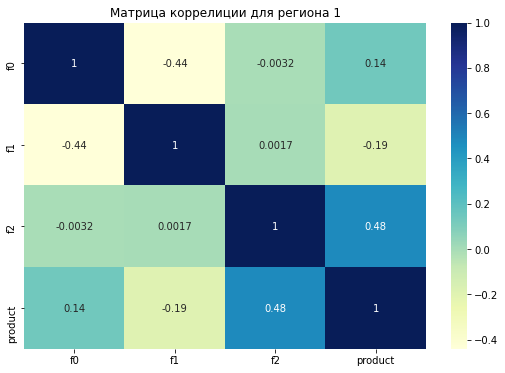

In [34]:
# Для региона 1
plt.figure(figsize=(9, 6))
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.title('Матрица корреляции для региона 1')
plt.show()

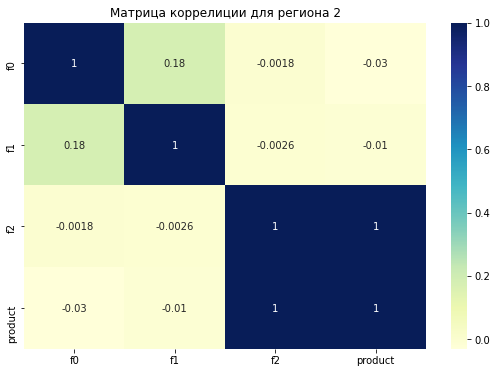

In [35]:
# Для региона 2
plt.figure(figsize=(9, 6))
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
plt.title('Матрица корреляции для региона 2')
plt.show()

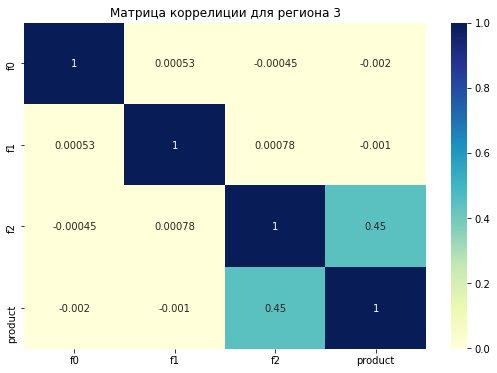

In [36]:
# Для региона 3
plt.figure(figsize=(9, 6))
sns.heatmap(df3.corr(), cmap="YlGnBu", annot=True)
plt.title('Матрица корреляции для региона 3')
plt.show()

**Гистограммы признаков**

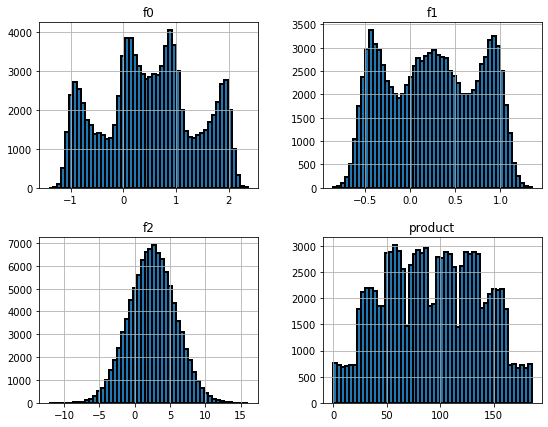

In [39]:
# Построим гистограмму признаков для df1
df1.hist(bins=50, figsize=(9, 7), edgecolor='black', linewidth=2)
plt.show()

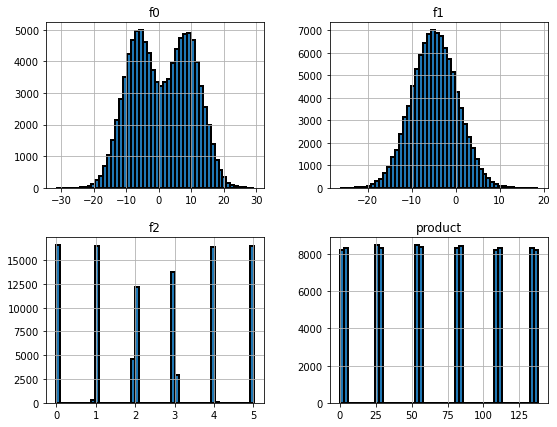

In [40]:
# Построим гистограмму признаков для df2
df2.hist(bins=50, figsize=(9, 7), edgecolor='black', linewidth=2)
plt.show()

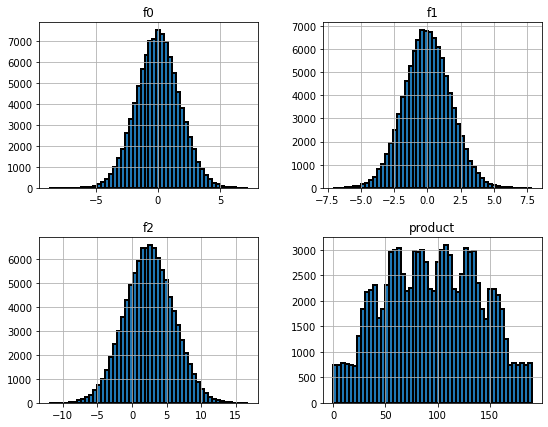

In [41]:
# Построим гистограмму признаков для df3
df3.hist(bins=50, figsize=(9, 7), edgecolor='black', linewidth=2)
plt.show()

**Краткий вывод**  
В первой части нашего исследования мы сохранили предоставленные нам данные по регионам в соответствующие переменные, проверили на отсутсвие явных дубликатов и пропусков. Проверив данные на взаимосвязь, видим среднее положительное влияние признаков f2 и product в регионах 1 и 3, а так же сильное положительное влияние в регионе 2. Относительно региона 2 - это также проявляется и на гистограммах распределения.

## Обучение и проверка модели

**Создание функции обучения модели**  
Функция принимает на вход датасет и производит с ним полный цикл,
         - разбиение на выборки,
         - масштабирование численных признаков,
         - обучение модели,
         - оценка качества модели

In [87]:
# Примем значение аргумента random_state в переменной STATE
STATE = np.random.RandomState(1234)

def split_scale_learn(df):
    # Делим данные на target и features
    target = df['product']
    features = df.drop(['product'], axis=1)

    # Делим данные на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(
        features,
        target,
        test_size=0.25,
        random_state=STATE)

    # Масштабируем признаки
    numeric = ['f0', 'f1', 'f2']

    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])

    # Обучаем модель
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)

    # Оцениваем модель
    rmse = mean_squared_error(predicted, target_valid) ** .5

    return rmse, predicted, features_train, features_valid, target_valid

In [88]:
# Вызов функции и сохранение переменных для региона 1
rmse1, predicted1, features_train1, features_valid1, target_valid1 = split_scale_learn(df1)

# Вызов функции и сохранение переменных для региона 2
rmse2, predicted2, features_train2, features_valid2, target_valid2 = split_scale_learn(df2)

# Вызов функции и сохранение переменных для региона 3
rmse3, predicted3, features_train, features_valid3, target_valid3 = split_scale_learn(df3)

**Вывод результатов**

In [89]:
print(f'Регион 1:\n')
print(f'\tКоличество строк в обучающей выборке: {features_train1.shape[0]}, или {(len(features_train1) / len(df1)):.1%} от исходных данных')
print(f'\tКоличество строк в валидационной выборке: {features_valid1.shape[0]}, или {(len(features_valid1) / len(df1)):.1%} от исходных данных')
print(f'\tСредний предсказанный запас сырья: {predicted1.mean():.3f}')
print(f'\tСредний истинный запас сырья: {df1["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse1:.2f}')

print(f'\nРегион 2:\n')
print(f'\tКоличество строк в обучающей выборке: {features_train2.shape[0]}, или {(len(features_train2) / len(df2)):.1%} от исходных данных')
print(f'\tКоличество строк в валидационной выборке: {features_valid2.shape[0]}, или {(len(features_valid2) / len(df2)):.1%} от исходных данных')
print(f'\tСредний предсказанный запас сырья: {predicted2.mean():.3f}')
print(f'\tСредний истинный запас сырья: {df2["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse2:.2f}')

print(f'\nРегион 3:\n')
print(f'\tКоличество строк в обучающей выборке: {features_train3.shape[0]}, или {(len(features_train3) / len(df3)):.1%} от исходных данных')
print(f'\tКоличество строк в валидационной выборке: {features_valid3.shape[0]}, или {(len(features_valid3) / len(df3)):.1%} от исходных данных')
print(f'\tСредний предсказанный запас сырья: {predicted3.mean():.3f}')
print(f'\tСредний истинный запас сырья: {df3["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse3:.2f}')

Регион 1:

	Количество строк в обучающей выборке: 75000, или 75.0% от исходных данных
	Количество строк в валидационной выборке: 25000, или 25.0% от исходных данных
	Средний предсказанный запас сырья: 92.430
	Средний истинный запас сырья: 92.500
	RMSE модели: 37.56

Регион 2:

	Количество строк в обучающей выборке: 75000, или 75.0% от исходных данных
	Количество строк в валидационной выборке: 25000, или 25.0% от исходных данных
	Средний предсказанный запас сырья: 68.983
	Средний истинный запас сырья: 68.825
	RMSE модели: 0.89

Регион 3:

	Количество строк в обучающей выборке: 75000, или 75.0% от исходных данных
	Количество строк в валидационной выборке: 25000, или 25.0% от исходных данных
	Средний предсказанный запас сырья: 94.779
	Средний истинный запас сырья: 95.000
	RMSE модели: 40.12


**Анализ результатов**  
Во второй части исследования мы разбили исходные данные на обучающую и валидационную выборки. Вычислили показатели среднего предсказанного запаса сырья и оценили качество модели с помощью метрики RMSE. Данная метрика вычисляет квадратный корень из значения средней квадратичной ошибки, что позволяет оценивать величину ошибки в понятных единицах измерения.

Согласно предсказаниям построенных моделей для каждого региона, средний запас предсказанного сырья больше в третьем регионе - модель предсказала залежи в 94.779 тыс. баррелей. В первом регионе запасы сопоставимы - 92.430 тыс. баррелей. Второй регион показал самые низкие значения - 68.983 тыс. баррелей.


## Подготовка к расчёту прибыли

**Определим ключевые значения**  
При разведке региона исследуюем 500 точек, из которых с помощью машинного обучения выберем 200 лучших для разработки.  
Бюджет на разработку скважин в регионе — 10 млрд рублей.  
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс.  
рублей, поскольку объём указан в тысячах баррелей.  
После оценки рисков оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей   средней прибылью.

In [55]:
BUDGET = 10000000000      #Бюджет на разработку скважин в регионе
POINTS = 500              #Количество иследуемых точек 
POINTS_PER_BUDGET = 200   #Какое количество наилучших точек будет отбираться для разработки 
INCOME_PER_UNIT = 450000  #Стоимость тысячи баррелей сырья

**Определение величины запаса сырья для безубыточной разработки**

In [56]:
# Бюджет на разработку скважины
COST_PER_UNIT = BUDGET / POINTS_PER_BUDGET

# Достаточный объем сырья для безубыточной разработки
LOSSLESS_POINT = COST_PER_UNIT / INCOME_PER_UNIT

print(f'Для безубыточной разработки одной скважины необходимо {round(LOSSLESS_POINT, 0)} тыс. баррелей')

Для безубыточной разработки одной скважины необходимо 111.0 тыс. баррелей


**Краткий вывод**  
Судя по данным полученным в третьей части исследования, для безубыточной разработки скважины необходим запас в 111 тыс. баррелей. В предыдущей части мы определили среднее предсказанное значение добычи нефти по регионам. Во всех трех регионах, средние показатели меньше безубыточных

## Расчёт прибыли и рисков 

**Создание функции расчета прибыли**  
Функция принимает на вход набор предсказаний и целевого
 признака валидационной выборки каждого региона
        и производит расчет прибыли от строительства скважины


In [81]:
def profit(predictions, target):
    # Отсортируем предсказанные данные по убыванию
    probs_sorted = pd.Series(predictions).sort_values(ascending=False)

    # Выберем 200 точек с самым высоким значением запасов нефти
    top_target = target[probs_sorted.index][:POINTS_PER_BUDGET]

    # Вычислим значение прибыли по этим точкам
    revenue = top_target.sum() * INCOME_PER_UNIT

    return revenue - BUDGET

**Создание функции расчета целевых показателей**  
Функция применяет технику Bootstrap с 1000 выборок
        предсказанных значений по каждому региону
        для распределение прибыли

In [90]:
def mean_rev_interval_risk(predictions, target):
    values = []

    # Заведем цикл перебора для выборок Bootstrap
    for i in range(1000):
        predictions_sample = pd.Series(predictions).sample(n=POINTS, replace=True, random_state=STATE)
        values.append(profit(predictions_sample, target.reset_index(drop=True)))

    # Запишем значение распределения выборок в объект Series
    values = pd.Series(values)

    # Определим целевые показатели
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    mean_revenue = sum(values) / len(values)
    risk_loss = len(values[values<0])/len(values)

    return mean_revenue, lower, upper, risk_loss, values

In [91]:
mean1, lower1, upper1, risk_loss1, values1 = mean_rev_interval_risk(predicted1, target_valid1)
mean2, lower2, upper2, risk_loss2, values2 = mean_rev_interval_risk(predicted2, target_valid2)
mean3, lower3, upper3, risk_loss3, values3 = mean_rev_interval_risk(predicted3, target_valid3)

In [92]:
values_result = pd.DataFrame({'Регион 1': values1,
                              'Регион 2': values2,
                              'Регион 3': values3})
values_result

,Регион 1,Регион 2,Регион 3
0,"518,538,693.74","410,697,073.43","349,615,236.57"
1,"3,166,419.16","518,364,984.61","309,759,052.32"
2,"495,082,253.73","681,763,946.30","324,067,936.32"
3,"-11,099,088.39","242,259,925.26","524,947,475.78"
4,"512,795,184.69","643,946,447.74","564,877,088.96"
...,...,...,...
995,"237,746,776.10","656,075,415.21","509,631,102.74"
996,"546,173,956.41","483,408,678.38","503,902,331.44"
997,"457,877,593.80","432,778,014.20","205,373,295.19"
998,"357,691,548.58","723,811,033.51","84,188,534.97"


**Определение показателей прибыли для Региона 1**

In [93]:
print('Регион 1:\n')
print(f'\tСредняя прибыль: {mean1:.2f}')
print(f'\tДоверительный интервал: {lower1:.2f} - {upper1:.2f}')
print(f'\tРиск убытков: {risk_loss1:.2%}')

Регион 1:

	Средняя прибыль: 392853884.51
	Доверительный интервал: -120448195.90 - 899077102.22
	Риск убытков: 6.10%


**Определение показателей прибыли для Региона 2**

In [94]:
print('Регион 2:\n')
print(f'\tСредняя прибыль: {mean2:.2f}')
print(f'\tДоверительный интервал: {lower2:.2f} - {upper2:.2f}')
print(f'\tРиск убытков: {risk_loss2:.2%}')

Регион 2:

	Средняя прибыль: 458572160.61
	Доверительный интервал: 65141235.38 - 858678931.73
	Риск убытков: 0.60%


**Определение показателей прибыли для Региона 3**

In [95]:
print('Регион 3:\n')
print(f'\tСредняя прибыль: {mean3:.2f}')
print(f'\tДоверительный интервал: {lower3:.2f} - {upper3:.2f}')
print(f'\tРиск убытков: {risk_loss3:.2%}')

Регион 3:

	Средняя прибыль: 381761274.44
	Доверительный интервал: -156487445.47 - 873879619.54
	Риск убытков: 7.80%


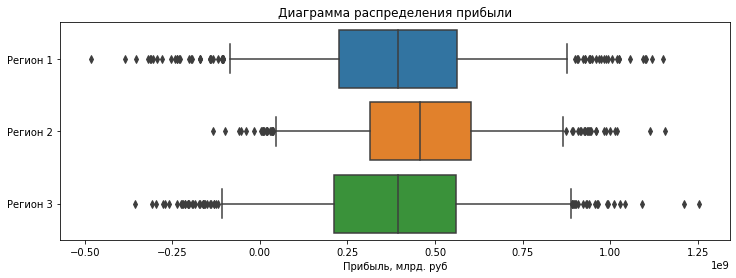

In [96]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=values_result, whis=0.95, orient='h')
plt.title('Диаграмма распределения прибыли')
plt.xlabel('Прибыль, млрд. руб')
plt.show();

**Краткий вывод**  
В результате расчетов получены следующие результаты: Риск убытков во втором регионе самый низкий и составляет 0.6%. В 1 и 3 регионе этот показатель составил 6.1% и 7.8%, соответственно - Средняя прибыль во втором регионе - самая высокая и составляет примерно, 459 млн. рублей. В 1 и 3 регионе этот показатель составил 393 млн. и 382 млн. рублей, соответственно.    
На основании этих данных, предлагаем остановиться на выборе региона №2 для строительства новых скважин.

# Вывод  
В данном исследовании, на основании данных проб нефти из трех регионов нам нужно было решить, в каком из регионов наиболее    эффективно бурить новую скважину.  

В первой части исследования мы загрузили данные, предоставленные компанией и сохранили в соответствующие переменные, рассмотрели  общую информацию о данных, произвели проверку данных на явные дубликаты и пропущенные значения.  

Во второй части, при помощи созданный функции, произвели разделение датасетов на обучающие признаки (features) и целевой (target) признаки, масштабировали числовые признаки в обучающих выборках и обучили модели линейной регрессии по данным каждого региона. В результате работы модели получили следующие результаты о качестве модели: средний запас сырья в регионах 1 и 3 оказались, примерно, на одном уровне - 92430 и 94779 баррелей, соответственно, а в регионе 2 - 68983 баррелей. Однако, по метрике RMSE - лучший результат, как раз у региона 2 (0.89). Регоны 1 и 3  37.56 и 40.12, соответственно.

В третьей части исследования мы определили ключевые значения и определили значение запасов для безубыточного строительства скважины - 111 тыс. баррелей, что не соответсвтвует средним показателям по регионам.

В четвертой части, при помощи техники Bootstrap разделили предсказанные значения каждого региона на 1000 выборок по 500 скважин в каждой, чтобы определить распределение прибыли. Далее определили 200 самых прибыльных скважин в каждом регионе и для них вычислили среднюю прибыль, 95%-й доверительный интервал и риск убытков.

В результате полученных данных предложили регион для строительства скважины с наименьшим риском убытка. Таким регионом оказался регион 2 со значением доли убыточного строительства 0.6%